## when to use D' Agostino test:
- D' means Departure from normality.
- this test is powerful when:
- the data is symmetrical in nature.
- when the distribution is long tailed.
- when the data is short tailed distributed this test will not perform well.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


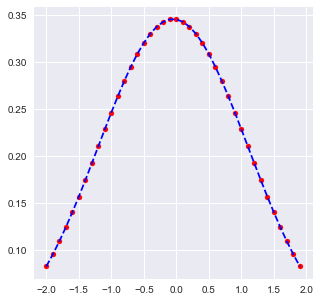

In [12]:
def pdf(x):
    mean=np.mean(x)
    std=np.std(x)
    y_out=1/ (std*np.sqrt(2*np.pi))*np.exp(-(x - mean)**2/(2*std**2))
    return y_out
    # to generttar an array of x
x=np.arange(-2,2,0.1)
y=pdf(x)
# plotting the normal curve / bell cure / gaussain distributuon
plt.style.use('seaborn')
plt.figure(figsize=(5,5))
plt.plot(x,y,color='blue', linestyle='dashed')
plt.scatter(x,y, marker='o',s=25, color='red')

### norm,al distribution and its test
1. imort dataset
2. subsetting a dataset
3. visual test for normal distributuion.
    1. Histogram
    2. qq.normplot
4. statistical test.


In [42]:
# import datatset
kashti=sns.load_dataset('iris')
kashti.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
# taking subsets
kashti=kashti[['sepal_length','sepal_width','petal_length']]
kashti.head()

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


<AxesSubplot:ylabel='Count'>

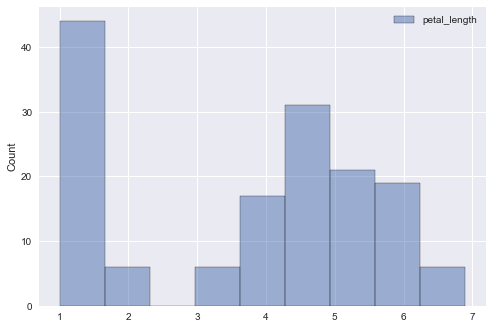

In [47]:
# histogram test
sns.histplot(kashti[['petal_length']])

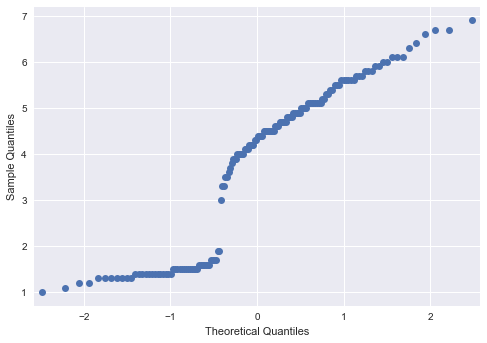

In [48]:
from statsmodels.graphics.gofplots import qqplot
## q-q norm plot
qqplot(kashti.petal_length)
plt.show()

### Normality Tests:
-  

In [49]:
#shapiro wilk
from scipy.stats import shapiro
stat,p=shapiro(kashti.petal_length)
print(f'stat:{stat} P_value:{p}')
if p>0.05:
    print("Ho accepted")
else:
    print("Ho Not accepted")

stat:0.8762688040733337 P_value:7.412849778454245e-10
Ho Not accepted


In [51]:
#de augestino's test
from scipy.stats import normaltest
stat,p=normaltest(kashti.petal_length)
print(f'stat:{stat} P_value:{p}')
if p>0.05:
    print("Ho accepted")
else:
    print("Ho Not accepted")

stat:221.68729405585384 P_value:7.264667501338673e-49
Ho Not accepted


### D' Agostino test:
- D' means Departure from normality.
- this test is powerful when:
- the data is symmetrical in nature.
- when the distribution is long tailed.
- when the data is short tailed distributed this test will not perform well.

In [ ]:
Assignment: kab de augestino test lagta haia

In [53]:
# Anderson darling test
from scipy.stats import anderson
statis,crit_val,sig_lvl=anderson(kashti.petal_length)
print(f'stat:{statis}\nCritical values:{crit_val},\nSignificnace_level:{sig_lvl}')
for i in range(len(crit_val)):
    sig_lvl1=sig_lvl[i]
    crit_val1=crit_val[i]
    if statis < crit_val1:
        print(f'ho accceted at percentage{sig_lvl1}')
    else:
        print(f'h0 rejected at percentage{sig_lvl1}') 


stat:7.6785455198266845
Critical values:[0.562 0.64  0.767 0.895 1.065],
Significnace_level:[15.  10.   5.   2.5  1. ]
h0 rejected at percentage15.0
h0 rejected at percentage10.0
h0 rejected at percentage5.0
h0 rejected at percentage2.5
h0 rejected at percentage1.0
